In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import fetch_openml


In [2]:
mnist_fashion = fetch_openml('Fashion-MNIST', as_frame=False)


c:\Users\KDP-25\.conda\envs\Torch_PY38\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist_fashion.data, mnist_fashion.target
X.shape, y.shape


((70000, 784), (70000,))

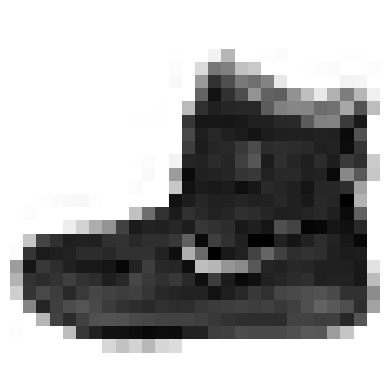

In [4]:
import matplotlib.pyplot as plt

def plot_fashion(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis("off")

some_fashion = X[0]
plot_fashion(some_fashion)
plt.show()


In [5]:
y = y.astype(np.int64)


In [6]:
X_train = torch.as_tensor(X[:60000], dtype=torch.float32)
y_train = torch.as_tensor(y[:60000], dtype=torch.int64)
X_test = torch.as_tensor(X[60000:], dtype=torch.float32)
y_test = torch.as_tensor(y[60000:], dtype=torch.int64)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([60000, 784]),
 torch.Size([60000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [7]:
scaled_X_train = X_train / 255.0
scaled_X_test = X_test / 255.0


In [8]:
y_one_hot = torch.zeros(y_train.shape[0], 10)
print(y_one_hot)
print(y_train.unsqueeze(1))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[9],
        [0],
        [0],
        ...,
        [3],
        [0],
        [5]])


In [9]:
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot)
print(y_one_hot.shape)


tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([60000, 10])


In [10]:
model = nn.Linear(784, 10)
optimizer = optim.SGD(model.parameters(), lr=1e-2)


In [11]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    prediction = model(scaled_X_train)
    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}')


Epoch    0/10000 Cost: 2.418640
Epoch  100/10000 Cost: 1.335700
Epoch  200/10000 Cost: 1.072670
Epoch  300/10000 Cost: 0.953813
Epoch  400/10000 Cost: 0.883368
Epoch  500/10000 Cost: 0.835196
Epoch  600/10000 Cost: 0.799345
Epoch  700/10000 Cost: 0.771168
Epoch  800/10000 Cost: 0.748175
Epoch  900/10000 Cost: 0.728895
Epoch 1000/10000 Cost: 0.712393
Epoch 1100/10000 Cost: 0.698039
Epoch 1200/10000 Cost: 0.685393
Epoch 1300/10000 Cost: 0.674131
Epoch 1400/10000 Cost: 0.664012
Epoch 1500/10000 Cost: 0.654851
Epoch 1600/10000 Cost: 0.646503
Epoch 1700/10000 Cost: 0.638851
Epoch 1800/10000 Cost: 0.631803
Epoch 1900/10000 Cost: 0.625282
Epoch 2000/10000 Cost: 0.619224
Epoch 2100/10000 Cost: 0.613576
Epoch 2200/10000 Cost: 0.608292
Epoch 2300/10000 Cost: 0.603336
Epoch 2400/10000 Cost: 0.598673
Epoch 2500/10000 Cost: 0.594276
Epoch 2600/10000 Cost: 0.590119
Epoch 2700/10000 Cost: 0.586182
Epoch 2800/10000 Cost: 0.582446
Epoch 2900/10000 Cost: 0.578894
Epoch 3000/10000 Cost: 0.575510
Epoch 31

In [12]:
num = 0
for i in range(scaled_X_test.shape[0]):
    pre_y = F.softmax(model(scaled_X_test[i])).max(0)[1]
    if pre_y == y_test[i]:
        num += 1
print(num/scaled_X_test.shape[0])


C:\Users\KDP-25\AppData\Local\Temp\ipykernel_9288\701917176.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pre_y = F.softmax(model(scaled_X_test[i])).max(0)[1]


0.8271
